In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
#warnings.simplefilter(action = "ignore", category = FutureWarning)

In [100]:
matches = pd.read_csv('/content/dataset1_test.csv') 
sampleData=pd.read_excel('/content/sample scores.xlsx')

In [102]:
matches.head()

,Batsman,Runs,Mins,BF,4s,6s,SR,Pos,Dismissal,Inns
0,1,33,78.0,56,5,0,58.92,3,caught,2
1,1,33,77.0,49,6,0,67.34,3,caught,4
2,1,215,503.0,346,25,1,62.13,3,lbw,1
3,1,58,67.0,48,9,0,120.83,3,bowled,3
4,1,7,26.0,18,1,0,38.88,3,caught,1


In [103]:
sampleData.head()

,Overs,Scores
0,1,10
1,2,5
2,3,6
3,4,11
4,5,12


In [104]:
from sklearn.linear_model import LinearRegression
import plotly.express as px
fig = px.scatter(sampleData,x='Overs',y='Scores')
fig.show()

In [99]:
from sklearn.linear_model import LinearRegression
import plotly.express as px
fig = px.scatter(matches,x='Innings',y='Runs')
fig.show()

In [4]:
Records=pd.DataFrame(matches)
Records.columns=['Batsman','Runs','Minute','Ballfaced','fours','sixes','StrikeRate','Position','DismissalAt','Innings']
#Records.head(10)

In [5]:
# split individual player records

batsman1 = Records[(Records.Batsman==1)]
batsman2 = Records[(Records.Batsman==2)]
batsman3 = Records[(Records.Batsman==3)]
batsman4 = Records[(Records.Batsman==4)]
batsman5 = Records[(Records.Batsman==5)]
batsman6 = Records[(Records.Batsman==6)]

              Runs
Batsman           
1        60.877193
2        57.557692
3        49.078125
4        49.406780
5        53.026316
6        35.769231


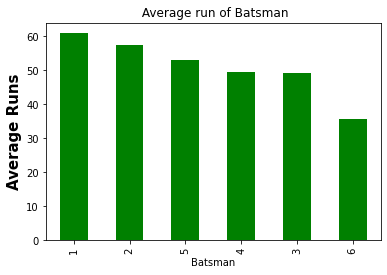

In [6]:
  ### average run of each player

avgOfPlayersGrpBy= Records[['Batsman','Runs']].groupby('Batsman').mean() 
print(avgOfPlayersGrpBy)
                 
avgOfPlayersGrpByPlot=avgOfPlayersGrpBy.sum(axis = 1).sort_values(ascending = False)
plt.ylabel('Average Runs',fontsize=15, fontweight='bold')
plt.rcParams["figure.figsize"] = [7,4]
avgOfPlayersGrpByPlot.plot(kind ='bar',color='green' ,title = " Average run of Batsman")

         fours  sixes  Runs  totalRunFromBoundary  runByFour  runBysix
Batsman                                                               
1          382     10  3470                  1588       1528        60
2          315      9  2993                  1314       1260        54
3          388      7  3141                  1594       1552        42
4          348     21  2915                  1518       1392       126
5          237      6  2015                   984        948        36
6          102      6   930                   444        408        36


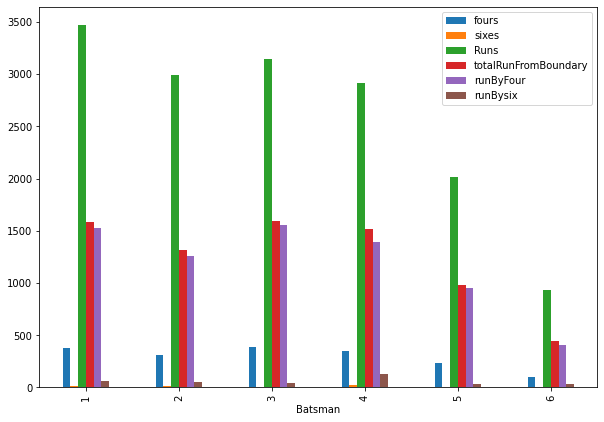

In [7]:
#batsman run by four sixes comparison

runBysixFour= Records[['Batsman','fours','sixes','Runs']].groupby('Batsman').sum() #run from boundary from each batsman
runBysixFour['totalRunFromBoundary']=runBysixFour['fours']*4+runBysixFour['sixes']*6
runBysixFour['runByFour']=runBysixFour['fours']*4
runBysixFour['runBysix']=runBysixFour['sixes']*6
runBysixFour['totalRunFromBoundary']
print(runBysixFour)

plt.rcParams["figure.figsize"] = [10,7]
plt.show(runBysixFour.plot.bar())

In [8]:
#batsman 1 data analysis

Average of Batsman 1:  60.87719298245614
Maximum of Batsman 1 in a Match:  239


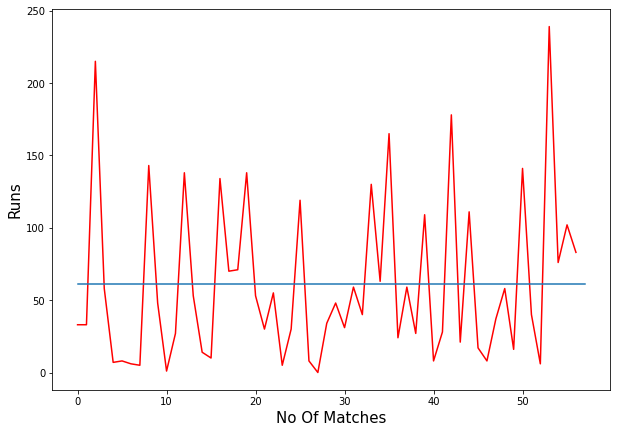

In [9]:
batsman1_run=batsman1['Runs'] #batsman 1 runs 
print(('Average of Batsman 1: '),  batsman1_run.mean())
print(('Maximum of Batsman 1 in a Match: '),  batsman1_run.max())

batsman1_run.plot(color='red')

p1=[batsman1_run.count(),0]    #x1,x2
p2=[batsman1_run.mean(),batsman1_run.mean()]   #y1,y2
plt.rcParams["figure.figsize"] = [10,7]
plt.plot(p1,p2)
plt.xlabel('No Of Matches',fontsize=15)
plt.ylabel('Runs',fontsize=15)
plt.rcParams["figure.figsize"] = [12,7]
plt.show()
plt.gcf().clear()
plt.clf()
plt.cla()
plt.close()

In [10]:
#calculation of batsman1 average run of each consecutive match
batsman1_avg = []
i=0
for row in batsman1_run:
    
        if i==0:
            batsman1_avg.append(row)

        else :
            value= (batsman1_avg[i-1]*i+row)/(i+1)
            batsman1_avg.append(value)
            
        i += 1

batsman1['avgRunPerMatch'] = batsman1_avg

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


Average of Batsman 1:  60.87719298245614
Maximum of Batsman 1 in a Match:  239


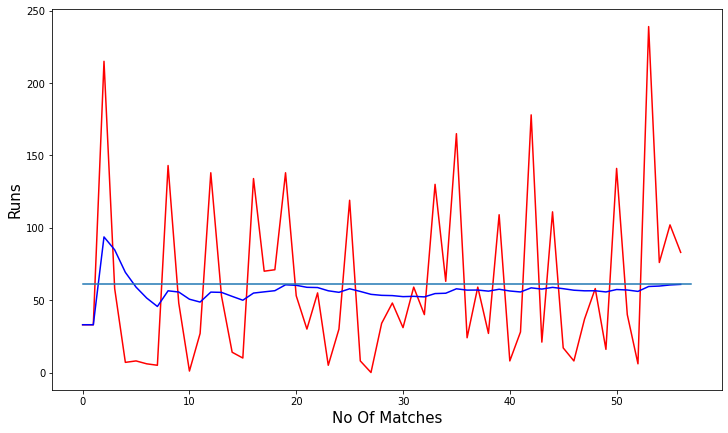

In [11]:
 #batsman 1 runs 
batsman1_avg_run=batsman1['avgRunPerMatch']       #batsman 1 average runs concecutive matches
print(('Average of Batsman 1: '),  batsman1_run.mean())
print(('Maximum of Batsman 1 in a Match: '),  batsman1_run.max())

batsman1_run.plot(color='red')
batsman1_avg_run.plot(color='blue')
p1=[batsman1_run.count(),0]    #x1,x2
p2=[batsman1_run.mean(),batsman1_run.mean()]   #y1,y2
plt.rcParams["figure.figsize"] = [10,7]
plt.plot(p1,p2)
plt.xlabel('No Of Matches',fontsize=15)
plt.ylabel('Runs',fontsize=15)
plt.rcParams["figure.figsize"] = [12,7]
plt.show()
plt.gcf().clear()
plt.clf()
plt.cla()
plt.close()

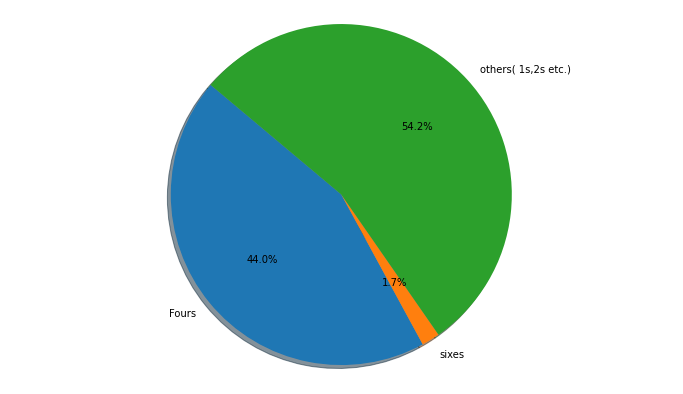

In [12]:
###run 
 
# Data to plot
labels = 'Fours', 'sixes', 'others( 1s,2s etc.)'
sizes = [batsman1['fours'].sum()*4,batsman1['sixes'].sum()*6,batsman1['Runs'].sum()-(batsman1['fours'].sum()*4+batsman1['sixes'].sum()*6)]

plt.pie(sizes,  labels=labels, 
        autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')
plt.show()


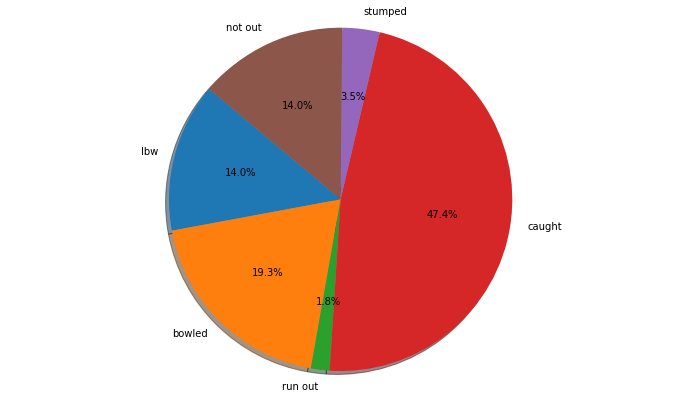

In [13]:
#print(batsman1)
batsman1_Dismissal_lbw =len( batsman1[(batsman1.DismissalAt=='lbw')])
batsman1_Dismissal_bowled =len( batsman1[(batsman1.DismissalAt=='bowled')])
batsman1_Dismissal_runout =len( batsman1[(batsman1.DismissalAt=='run out')])
batsman1_Dismissal_caught =len( batsman1[(batsman1.DismissalAt=='caught')])
batsman1_Dismissal_notout=len( batsman1[(batsman1.DismissalAt=='not out')])
batsman1_Dismissal_stumped =len( batsman1[(batsman1.DismissalAt=='stumped')])

labels = 'lbw', 'bowled', 'run out','caught','stumped','not out'
sizes = [batsman1_Dismissal_lbw,batsman1_Dismissal_bowled,batsman1_Dismissal_runout,
          batsman1_Dismissal_caught,batsman1_Dismissal_stumped,batsman1_Dismissal_notout]

plt.pie(sizes,  labels=labels, 
        autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')
plt.show()

Total no of matches of Batsman 1 at position 3:  25
Total no of matches of Batsman 1 at position 4:  30 


Average of Batsman 1 at position 3:  58.44
Average of Batsman 1 at position 4:  65.7 


Total run of Batsman 1 at position 3:  1461
Total run of Batsman 1 at position 4:  1971 


average strike rate  Batsman 1 at position 3:  70.87760000000002
average strike rate of Batsman 1 at position 4:  55.248666666666665 




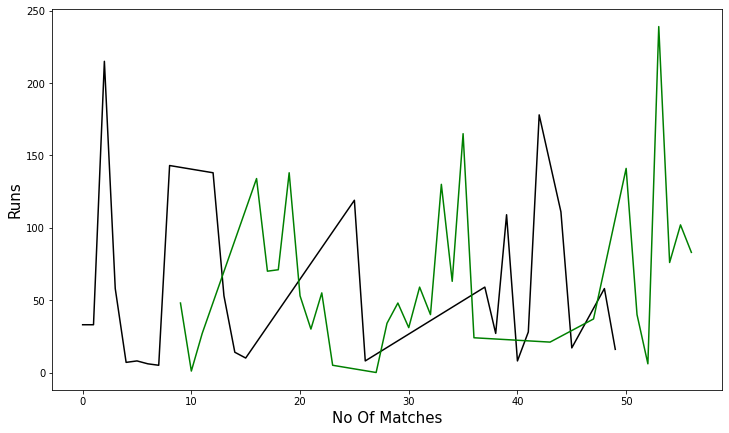

In [14]:
batsman1_runat_3 = batsman1[(batsman1.Position==3)]
batsman1_runat_4 = batsman1[(batsman1.Position==4)]
#print(batsman1_runat_3)
batsman1_runat_3_runs=batsman1_runat_3['Runs']       #batsman 1 average runs concecutive matches
batsman1_runat_4_runs=batsman1_runat_4['Runs']
batsman1_runat_3_strikerate=batsman1_runat_3['StrikeRate']       #batsman 1 average runs concecutive matches
batsman1_runat_4_strikerate=batsman1_runat_4['StrikeRate']

print(('Total no of matches of Batsman 1 at position 3: '),  batsman1_runat_3_runs.count())
print(('Total no of matches of Batsman 1 at position 4: '),  batsman1_runat_4_runs.count(),'\n\n')

print(('Average of Batsman 1 at position 3: '),  batsman1_runat_3_runs.mean())
print(('Average of Batsman 1 at position 4: '),  batsman1_runat_4_runs.mean(),'\n\n')

print(('Total run of Batsman 1 at position 3: '),  batsman1_runat_3_runs.sum())
print(('Total run of Batsman 1 at position 4: '),  batsman1_runat_4_runs.sum(),'\n\n')

print(('average strike rate  Batsman 1 at position 3: '),  batsman1_runat_3_strikerate.mean())
print(('average strike rate of Batsman 1 at position 4: '),  batsman1_runat_4_strikerate.mean(),'\n\n')

batsman1_runat_3_runs.plot(color='black')
batsman1_runat_4_runs.plot(color='green')


plt.rcParams["figure.figsize"] = [10,7]
plt.xlabel('No Of Matches',fontsize=15)
plt.ylabel('Runs',fontsize=15)
plt.rcParams["figure.figsize"] = [12,7]
plt.show()
plt.gcf().clear()
plt.clf()
plt.cla()
plt.close()

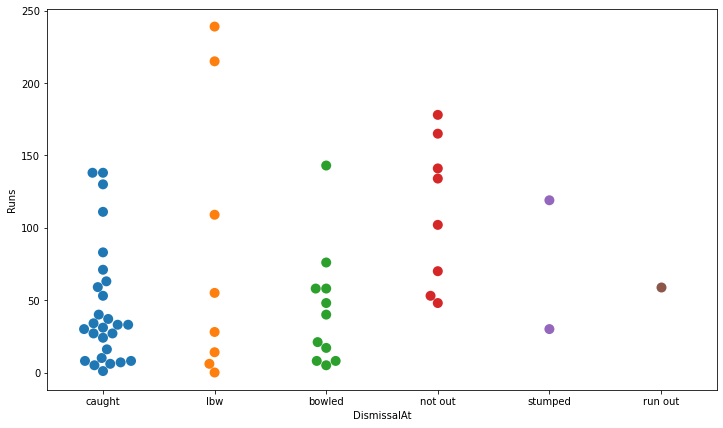

In [15]:
ax=sns.swarmplot(y="Runs", x="DismissalAt",size=10, data=batsman1)

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 50.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


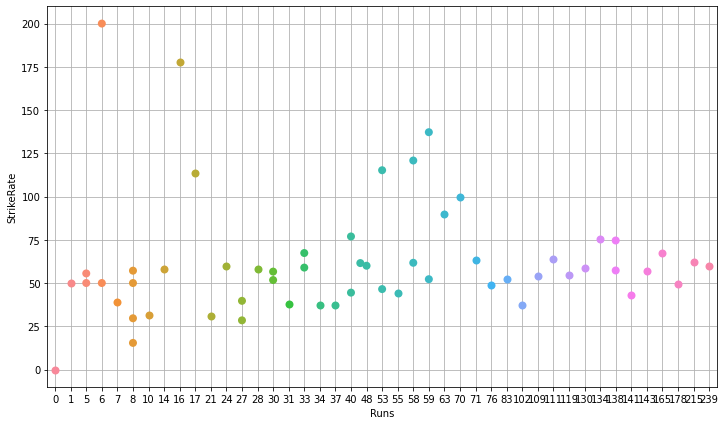

In [16]:
ax=sns.swarmplot(y="StrikeRate", x="Runs",size=8,data=batsman1)

ax.grid(True)
#ax=sns.swarmplot(y="StrikeRate", x="Runs",size=8, data=batsman1[(batsman1.Position==3) | (batsman1.Position==4)])

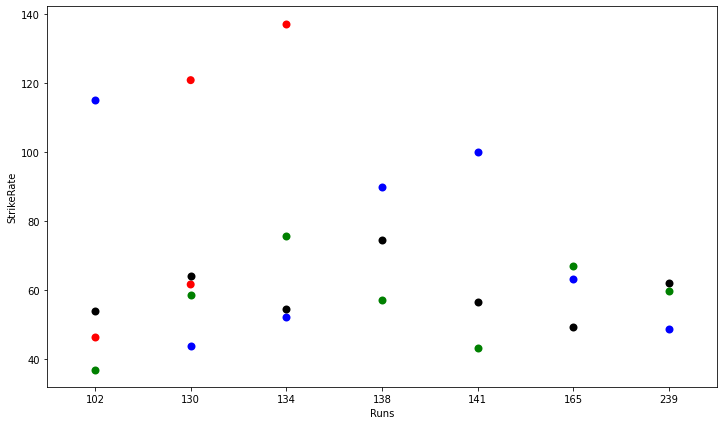

In [17]:
ax=sns.swarmplot(y="StrikeRate", x="Runs",size=8, color='red',data=batsman1[(batsman1.Position==3) & (batsman1.Runs>=50)&(batsman1.Runs<100) ])
ax=sns.swarmplot(y="StrikeRate", x="Runs",size=8, color='blue',data=batsman1[(batsman1.Position==4) & (batsman1.Runs>=50)& (batsman1.Runs>=50)&(batsman1.Runs<100)  ])
#red position 3   50<run<100
#blue position 4  50<run<100
ax=sns.swarmplot(y="StrikeRate", x="Runs",size=8, color='black',data=batsman1[(batsman1.Position==3) & (batsman1.Runs>=100) ])
ax=sns.swarmplot(y="StrikeRate", x="Runs",size=8, color='green',data=batsman1[(batsman1.Position==4) & (batsman1.Runs>=100)  ])
#black  position 3 more than 100 run
#green  position 4 more than 100 run

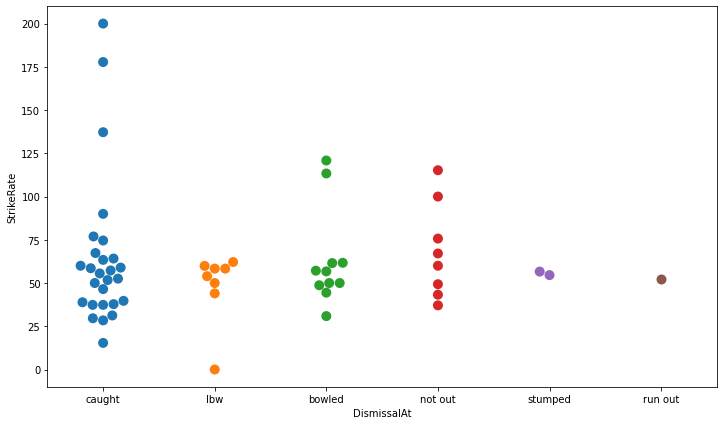

In [18]:
ax=sns.swarmplot(y="StrikeRate", x="DismissalAt",size=10, data=batsman1)

In [19]:
#batsman 2 data analysis

Average of Batsman 2:  57.55769230769231
Maximum of Batsman 2 in a Match:  243


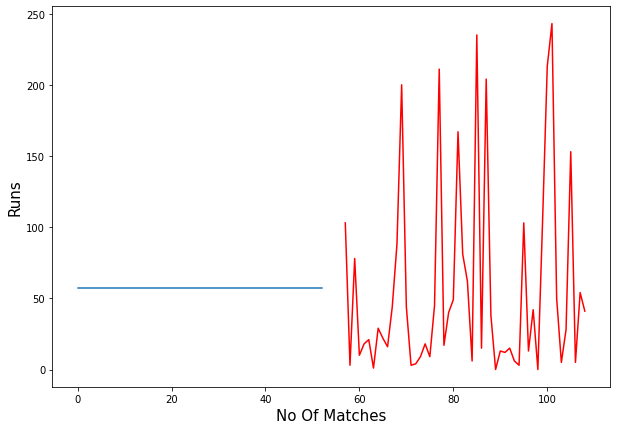

In [94]:
batsman2_run=batsman2['Runs'] #batsman 1 runs 
print(('Average of Batsman 2: '),  batsman2_run.mean())
print(('Maximum of Batsman 2 in a Match: '),  batsman2_run.max())

batsman2_run.plot(color='red')

p1=[batsman2_run.count(),0]    #x1,x2
p2=[batsman2_run.mean(),batsman2_run.mean()]   #y1,y2
plt.rcParams["figure.figsize"] = [10,7]
plt.plot(p1,p2)
plt.xlabel('No Of Matches',fontsize=15)
plt.ylabel('Runs',fontsize=15)
plt.rcParams["figure.figsize"] = [12,7]
plt.show()
plt.gcf().clear()
plt.clf()
plt.cla()
plt.close()

In [95]:
#calculation of batsman1 average run of each consecutive match
batsman2_avg = []
match_no = []
i=0
for row in batsman2_run:
        match_no.append(i+1)
        if i==0:
            batsman2_avg.append(row)

        else :
            value= (batsman2_avg[i-1]*i+row)/(i+1)
            batsman2_avg.append(value)
            
        i += 1

batsman2['avgRunPerMatch'] = batsman2_avg
batsman2['match_no']=match_no

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Average of Batsman 2:  60.87719298245614
Maximum of Batsman 2 in a Match:  239


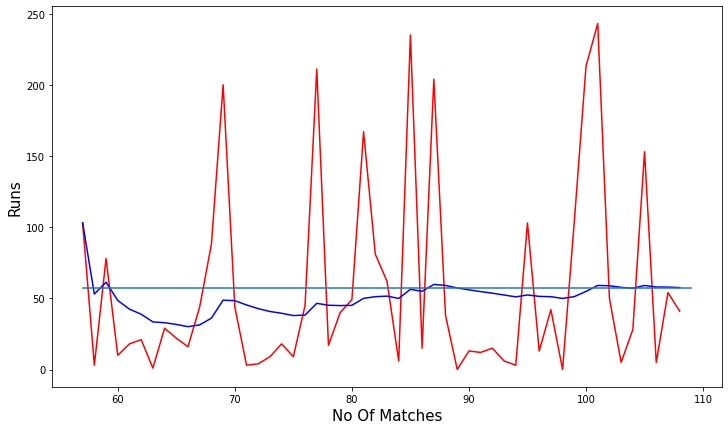

In [96]:
 #batsman 2 runs       #batsman 2 average runs concecutive matches
print(('Average of Batsman 2: '),  batsman1_run.mean())
print(('Maximum of Batsman 2 in a Match: '),  batsman1_run.max())

batsman2['Runs'].plot(color='red')
batsman2['avgRunPerMatch'].plot(color='blue')
p1=[batsman2_run.count()+57,57]    #x1,x2
p2=[batsman2_run.mean(),batsman2_run.mean()]   #y1,y2
plt.rcParams["figure.figsize"] = [10,7]
plt.plot(p1,p2)
plt.xlabel('No Of Matches',fontsize=15)
plt.ylabel('Runs',fontsize=15)
plt.rcParams["figure.figsize"] = [12,7]
plt.show()
plt.gcf().clear()
plt.clf()
plt.cla()
plt.close()

Average of Batsman 2:  60.87719298245614
Maximum of Batsman 2 in a Match:  239


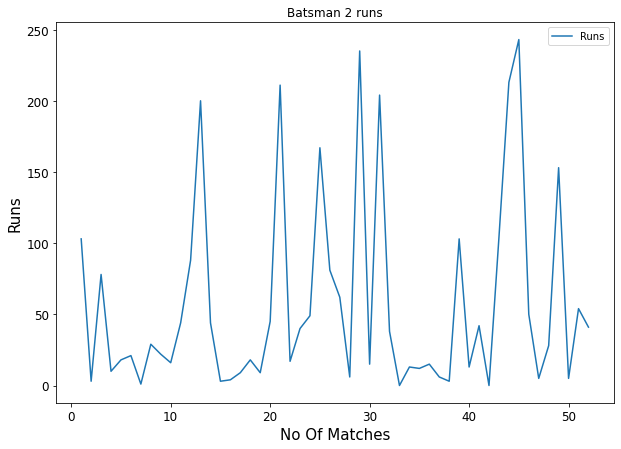

In [97]:
#batsman 2 runs 
batsman2_avg_runs=batsman2['avgRunPerMatch']       #batsman 1 average runs concecutive matches

print(('Average of Batsman 2: '),  batsman1_run.mean())
print(('Maximum of Batsman 2 in a Match: '),  batsman1_run.max())
ax = batsman2.plot(kind='line',x='match_no',y='Runs', title ="Batsman 2 runs",figsize=(10,7),legend=True, fontsize=12)
plt.xlabel('No Of Matches',fontsize=15)


plt.ylabel('Runs',fontsize=15)
plt.show()

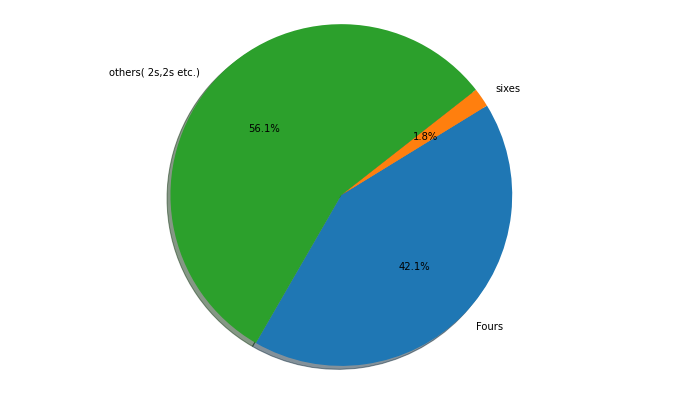

In [23]:
###run 
 
# Data to plot
labels = 'Fours', 'sixes', 'others( 2s,2s etc.)'
sizes = [batsman2['fours'].sum()*4,batsman2['sixes'].sum()*6,batsman2['Runs'].sum()-(batsman2['fours'].sum()*4+batsman2['sixes'].sum()*6)]

plt.pie(sizes,  labels=labels, 
        autopct='%1.1f%%', shadow=True, startangle=240)
 
plt.axis('equal')
plt.show()

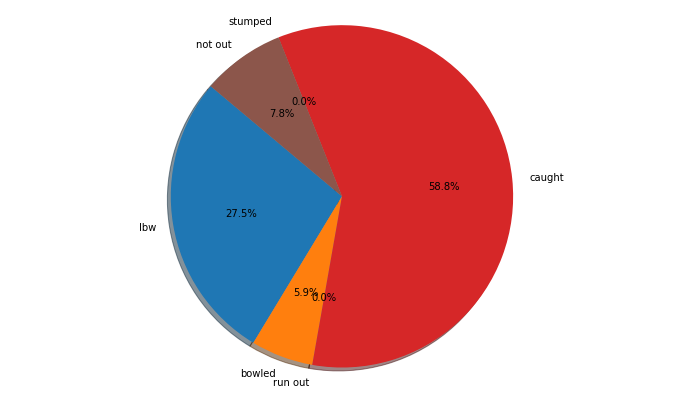

In [24]:
#print(batsman2)
batsman2_Dismissal_lbw =len( batsman2[(batsman2.DismissalAt=='lbw')])
batsman2_Dismissal_bowled =len( batsman2[(batsman2.DismissalAt=='bowled')])
batsman2_Dismissal_runout =len( batsman2[(batsman2.DismissalAt=='run out')])
batsman2_Dismissal_caught =len( batsman2[(batsman2.DismissalAt=='caught')])
batsman2_Dismissal_notout=len( batsman2[(batsman2.DismissalAt=='not out')])
batsman2_Dismissal_stumped =len( batsman2[(batsman2.DismissalAt=='stumped')])

labels = 'lbw', 'bowled', 'run out','caught','stumped','not out'
sizes = [batsman2_Dismissal_lbw,batsman2_Dismissal_bowled,batsman2_Dismissal_runout,
          batsman2_Dismissal_caught,batsman2_Dismissal_stumped,batsman2_Dismissal_notout]

plt.pie(sizes,  labels=labels, 
        autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')
plt.show()

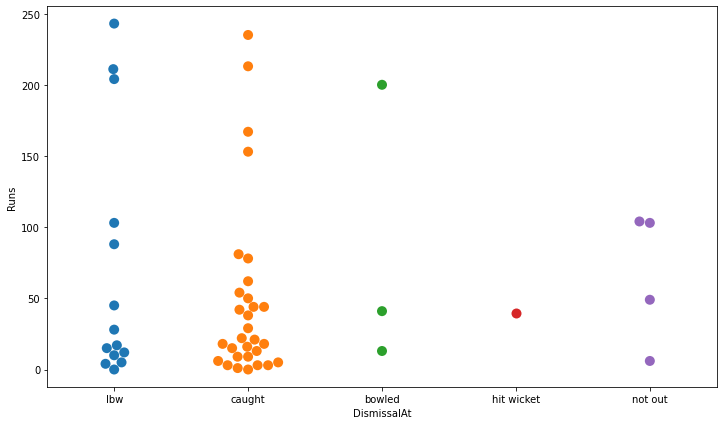

In [25]:
ax=sns.swarmplot(y="Runs", x="DismissalAt",size=10, data=batsman2)

Total no of matches of Batsman 2 at position 3:  2
Total no of matches of Batsman 2 at position 4:  46
Total no of matches of Batsman 2 at position 5:  4 


Average of Batsman 2 at position 3:  3.5
Average of Batsman 2 at position 5:  60.95652173913044
Average of Batsman 2 at position 5:  45.5 


Total run of Batsman 2 at position 3:  7
Total run of Batsman 2 at position 4:  2804
Total run of Batsman 2 at position 5:  182 


average strike rate  Batsman 2 at position 3:  30.509999999999998
average strike rate of Batsman 2 at position 4:  54.017173913043464
average strike rate of Batsman 2 at position 5:  55.355000000000004 




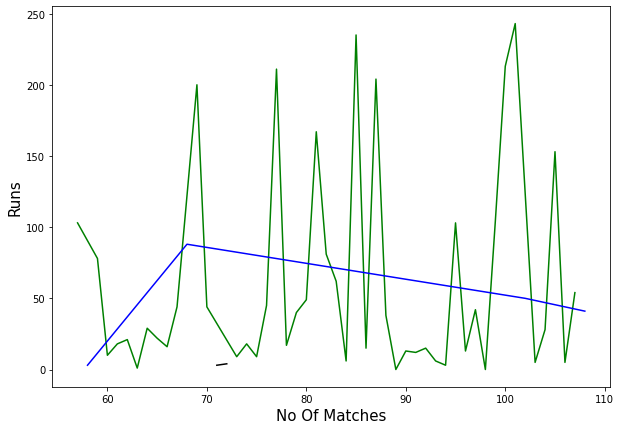

In [27]:
batsman2_runat_3 = batsman2[(batsman2.Position==3)]
batsman2_runat_4 = batsman2[(batsman2.Position==4)]
batsman2_runat_5 = batsman2[(batsman2.Position==5)]
#print(batsman2_runat_3)
batsman2_runat_3_runs=batsman2_runat_3['Runs']       #batsman 2 average runs concecutive matches
batsman2_runat_4_runs=batsman2_runat_4['Runs']
batsman2_runat_5_runs=batsman2_runat_5['Runs']
batsman2_runat_3_strikerate=batsman2_runat_3['StrikeRate']       #batsman 2 average runs concecutive matches
batsman2_runat_4_strikerate=batsman2_runat_4['StrikeRate']
batsman2_runat_5_strikerate=batsman2_runat_5['StrikeRate']

print(('Total no of matches of Batsman 2 at position 3: '),  batsman2_runat_3_runs.count())
print(('Total no of matches of Batsman 2 at position 4: '),  batsman2_runat_4_runs.count())
print(('Total no of matches of Batsman 2 at position 5: '),  batsman2_runat_5_runs.count(),'\n\n')

print(('Average of Batsman 2 at position 3: '),  batsman2_runat_3_runs.mean())
print(('Average of Batsman 2 at position 5: '),  batsman2_runat_4_runs.mean())
print(('Average of Batsman 2 at position 5: '),  batsman2_runat_5_runs.mean(),'\n\n')

print(('Total run of Batsman 2 at position 3: '),  batsman2_runat_3_runs.sum())
print(('Total run of Batsman 2 at position 4: '),  batsman2_runat_4_runs.sum())
print(('Total run of Batsman 2 at position 5: '),  batsman2_runat_5_runs.sum(),'\n\n')

print(('average strike rate  Batsman 2 at position 3: '),  batsman2_runat_3_strikerate.mean())
print(('average strike rate of Batsman 2 at position 4: '),  batsman2_runat_4_strikerate.mean())
print(('average strike rate of Batsman 2 at position 5: '),  batsman2_runat_5_strikerate.mean(),'\n\n')

batsman2_runat_3_runs.plot(color='black')
batsman2_runat_4_runs.plot(color='green')
batsman2_runat_5_runs.plot(color='blue')

plt.rcParams["figure.figsize"] = [10,7]
plt.xlabel('No Of Matches',fontsize=15)
plt.ylabel('Runs',fontsize=15)

plt.show()
plt.gcf().clear()
plt.clf()
plt.cla()
plt.close()

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 50.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 33.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


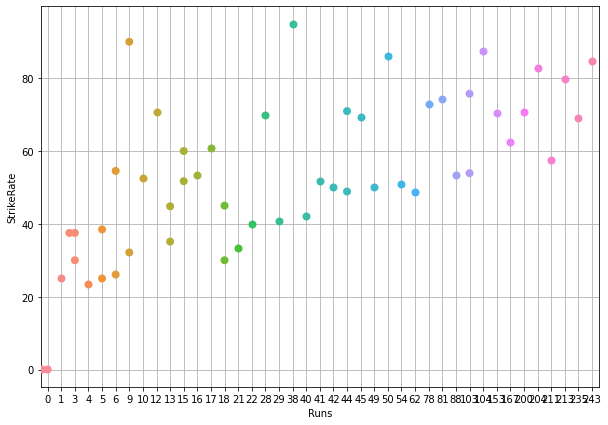

In [28]:
ax=sns.swarmplot(y="StrikeRate", x="Runs",size=8,data=batsman2)

ax.grid(True)
#ax=sns.swarmplot(y="StrikeRate", x="Runs",size=8, data=batsman1[(batsman1.Position==3) | (batsman1.Position==4)])

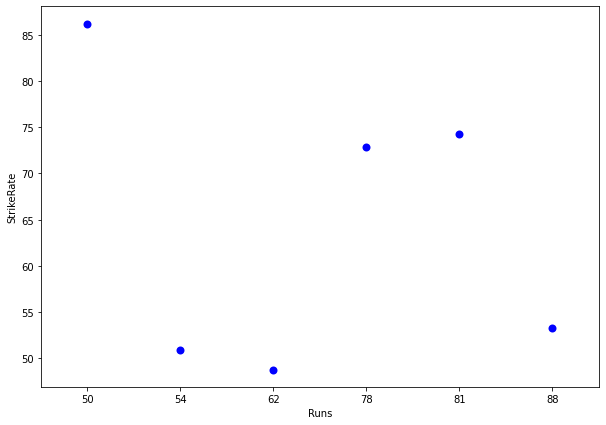

In [29]:
ax=sns.swarmplot(y="StrikeRate", x="Runs",size=8, color='blue',data=batsman2[ (batsman2.Runs>=50) &   (batsman2.Runs<=100) ])

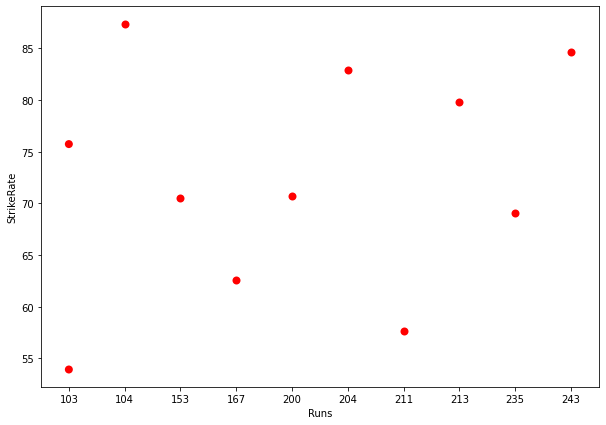

In [30]:
ax=sns.swarmplot(y="StrikeRate", x="Runs",size=8, color='red',data=batsman2[ (batsman2.Runs>=100) ])

In [31]:
#keep batsman1 all record in data
data = batsman1

In [32]:
#check the data
data.head()

,Batsman,Runs,Minute,Ballfaced,fours,sixes,StrikeRate,Position,DismissalAt,Innings,avgRunPerMatch
0,1,33,78.0,56,5,0,58.92,3,caught,2,33.000000
1,1,33,77.0,49,6,0,67.34,3,caught,4,33.000000
2,1,215,503.0,346,25,1,62.13,3,lbw,1,93.666667
3,1,58,67.0,48,9,0,120.83,3,bowled,3,84.750000
4,1,7,26.0,18,1,0,38.88,3,caught,1,69.200000


In [33]:
data.columns

Index(['Batsman', 'Runs', 'Minute', 'Ballfaced', 'fours', 'sixes',
       'StrikeRate', 'Position', 'DismissalAt', 'Innings', 'avgRunPerMatch'],
      dtype='object')

In [34]:
#our feature variable "Runs"
X = data[['Runs']]

In [35]:
X.head()

,Runs
0,33
1,33
2,215
3,58
4,7


In [36]:
#our Target variable "number of ball faced"
Y = data[['Ballfaced']]

In [37]:
Y.head()

,Ballfaced
0,56
1,49
2,346
3,48
4,18


In [55]:
#import train,test split library 
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2 ,random_state = 1)

In [56]:
X_train.head()

,Runs
26,8
39,109
36,24
10,1
49,16


In [57]:
Y_train.head()

,Ballfaced
26,14
39,202
36,40
10,2
49,9


In [58]:
X_test.head()

,Runs
47,37
2,215
34,63
45,17
38,27


In [59]:
Y_test.head()

,Ballfaced
47,99
2,346
34,70
45,15
38,95


In [60]:
data.shape

(57, 11)

In [61]:
X_train.shape

(45, 1)

In [62]:
Y_train.shape

(45, 1)

In [63]:
X_test.shape

(12, 1)

In [64]:
Y_test.shape

(12, 1)

In [65]:
#import linear regression
from sklearn.linear_model import LinearRegression
#create instance
LR = LinearRegression()

In [66]:
LR.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [67]:
# y = mx + c (coefficient , intercept
print(LR.intercept_)
print(LR.coef_)

[4.25122839]
[[1.63446275]]


In [68]:
# X_test = Runs (input) 
# we will predict number of ball faced
prediction = LR.predict(X_test)

In [69]:
print(prediction)

[[ 64.72635009]
 [355.66071934]
 [107.22238155]
 [ 32.03709512]
 [ 48.3817226 ]
 [216.73138571]
 [ 17.32693038]
 [229.8070877 ]
 [ 53.28511085]
 [234.71047594]
 [170.96642875]
 [ 99.05006781]]


In [89]:
# 200 = Run
prediction = LR.predict([[200]])

In [91]:
#for 200 run batsman may b faced 331 or 332 ball
print(int(prediction))

331
